# **Fake New Detector**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import os
import re
import nltk
from wordcloud import WordCloud, STOPWORDS


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
#in title we just have single line
train['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [6]:
#in the text we have whole article
train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [7]:
#shape of dataset
print(train.shape,test.shape)

(20800, 5) (5200, 4)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
#counting null values
print('Train ')
print(train.isnull().sum())
print('Test ')
print(test.isnull().sum())

Train 
id           0
title      558
author    1957
text        39
label        0
dtype: int64
Test 
id          0
title     122
author    503
text        7
dtype: int64


In [11]:
# Filling text columns with an empty string
train.fillna({'title': '', 'author': '', 'text': ''}, inplace=True)
test.fillna({'title': '', 'author': '', 'text': ''}, inplace=True)

In [13]:
#counting null values
print('Train ')
print(train.isnull().sum())
print('Test ')
print(test.isnull().sum())


Train 
id        0
title     0
author    0
text      0
label     0
dtype: int64
Test 
id        0
title     0
author    0
text      0
dtype: int64


In [14]:
#merging all 3 columns data into new column
train['total']=train['title']+' '+train['author']+' '+train['text']
test['total']=test['title']+' '+test['author']+' '+test['text']

In [15]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


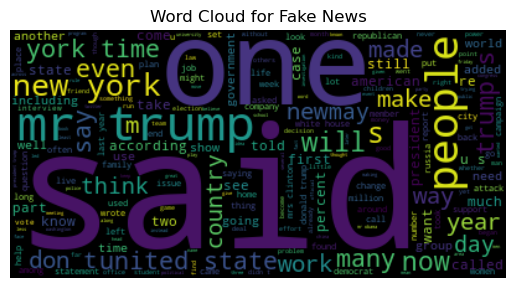

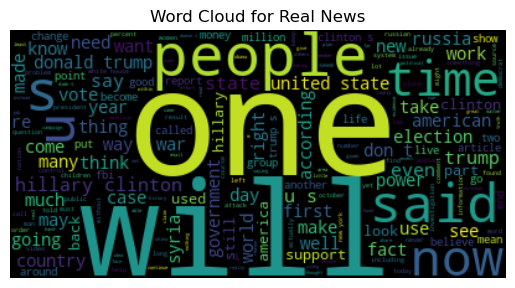

In [16]:

# Check if there are rows with label 0
if any(train['label'] == 0):
    # Create a word cloud for fake news
    wordcloud_fake = WordCloud(stopwords=STOPWORDS).generate(train[train['label'] == 0]['total'].str.lower().str.cat(sep=' '))

    # Display the word cloud for fake news
    plt.imshow(wordcloud_fake, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Fake News")
    plt.show()
else:
    print("No data available for fake news.")

# Check if there are rows with label 1
if any(train['label'] == 1):
    # Create a word cloud for real news
    wordcloud_real = WordCloud(stopwords=STOPWORDS).generate(train[train['label'] == 1]['total'].str.lower().str.cat(sep=' '))

    # Display the word cloud for real news
    plt.imshow(wordcloud_real, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Real News")
    plt.show()
else:
    print("No data available for real news.")

# Preprocessing

### Regex

In [17]:
# regex to remove punctuation and constraints
#let's show an example
#before regex
s='@#$H%&*e?>l!l-o w[or}]ld()'
print(s)

@#$H%&*e?>l!l-o w[or}]ld()


In [18]:
#with regex
s=re.sub(r'[^\w\s]', '', s)
print(s)

Hello world


### Tokenization

In [21]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Waheed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.word_tokenize("Hello, how are you?")

['Hello', ',', 'how', 'are', 'you', '?']

### StopWords

In [24]:
from nltk.corpus import stopwords
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Waheed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
# Sample string with stopwords
string= train['title'][0]

# Tokenize the string
tokens = nltk.word_tokenize(string)

# Remove stopwords
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Print the original and filtered tokens
print("Original Tokens:", tokens)
print("Filtered Tokens:", filtered_tokens)

Original Tokens: ['House', 'Dem', 'Aide', ':', 'We', 'Didn', '’', 't', 'Even', 'See', 'Comey', '’', 's', 'Letter', 'Until', 'Jason', 'Chaffetz', 'Tweeted', 'It']
Filtered Tokens: ['House', 'Dem', 'Aide', ':', '’', 'Even', 'See', 'Comey', '’', 'Letter', 'Jason', 'Chaffetz', 'Tweeted']


# Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
#example
string="had been done languages cities dying mice playing"
tokens=nltk.word_tokenize(string)
for word in tokens:
  print(lemmatizer.lemmatize(word))

had
been
done
language
city
dying
mouse
playing


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Waheed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Let's Apply

In [29]:

lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
  filtered_sentence =''
  sentence = row['total']
  sentence=re.sub(r'[^\w\s]','',sentence)#cleaning
  words=nltk.word_tokenize(sentence)#tokenization
  words=[word for word in words if not word in stop_words]#stopwords removal

  for word in words:
    filtered_sentence =filtered_sentence +' '+ str(lemmatizer.lemmatize(word)).lower()
  train.loc[index,'total']=filtered_sentence




In [30]:
train.head(10)

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,jackie mason hollywood would love trump he bo...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,life life of luxury elton johns 6 favorite sh...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,benoît hamon wins french socialist partys pre...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,excerpts from draft script donald trumps qamp...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,a backchannel plan ukraine russia courtesy tr...


In [31]:
#removing unneccesory columns
train=train[['total','label']]

In [32]:
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


# Applying NLP Techniques

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer

In [34]:
#train splition
X_train=train['total']
Y_train=train['label']

### Bag of words/CountVectorizer

In [35]:
corpus={'This is an apple',
        'He lives in City and he bought car,',
        'This is the city of pakistan'}
vectorizer= CountVectorizer()
x=vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['an' 'and' 'apple' 'bought' 'car' 'city' 'he' 'in' 'is' 'lives' 'of'
 'pakistan' 'the' 'this']


In [36]:
print(x.toarray())

[[1 0 1 0 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 1 1 2 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 1 1 1]]


### TF-IDF Vectorizer

In [37]:
def vectorize_text(features,max_features):
  vectorizer=TfidfVectorizer(stop_words='english',
                              decode_error='strict',
                             analyzer='word',
                             ngram_range=(1,2),
                             max_features=max_features
                              )
  feature_vec=vectorizer.fit_transform(features)
  return feature_vec.toarray()

In [38]:
tfidf_feature=vectorize_text(['hello how are you doing','hi i am doing goog'],30)
print(tfidf_feature)

[[0.44943642 0.         0.         0.6316672  0.6316672  0.
  0.        ]
 [0.33517574 0.47107781 0.47107781 0.         0.         0.47107781
  0.47107781]]


# Let's Apply


In [56]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_metrix=count_vectorizer.transform(X_train)
tfidf= TfidfTransformer(norm='l2')
tfidf.fit(freq_term_metrix)
tf_idf_matrix=tfidf.fit_transform(freq_term_metrix)

In [57]:
tf_idf_matrix

<20800x210578 sparse matrix of type '<class 'numpy.float64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

# Modeling

In [59]:
test_count= count_vectorizer.transform(test['total'].values)
test_tfidf= tfidf.transform(test_count)

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test=train_test_split(tf_idf_matrix, Y_train,random_state=0)

In [63]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(15600, 210578) (15600,) (5200, 210578) (5200,)


# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.96


In [65]:
#Confusion matrix
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2448  116]
 [  84 2552]]


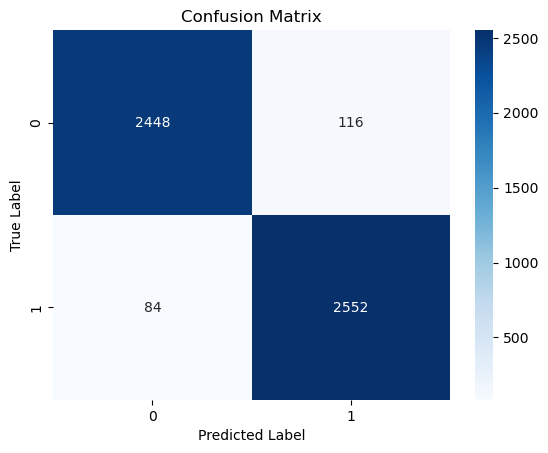

In [66]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#  Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.94


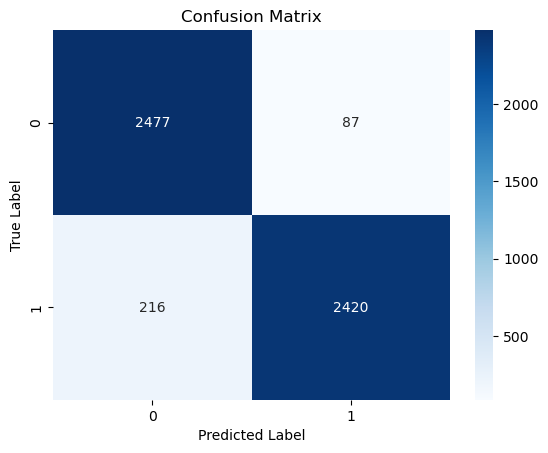

In [68]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.97


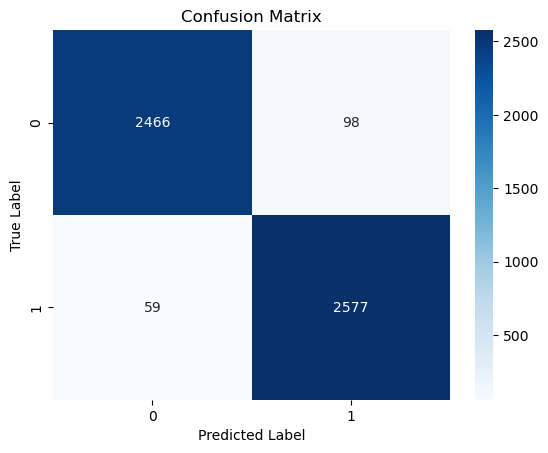

In [70]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Pipeline

In [126]:
from sklearn.pipeline import Pipeline
import joblib
from joblib import dump, load
from sklearn.tree import DecisionTreeClassifier

In [109]:
pipeline = Pipeline([
    ('vec',CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


In [110]:
X_train=train['total']
Y_train=train['label']

In [111]:
# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [113]:

pre=pipeline.predict([' house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucus house dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed the fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october 28 2016 of course know case comey actually saying reviewing email light unrelated casewhich know anthony weiners sexting teenager but apparently little thing fact didnt matter chaffetz the utah republican already vowed initiate raft investigation hillary winsat least two year worth possibly entire term worth apparently chaffetz thought fbi already work himresulting tweet briefly roiled nation cooler head realized dud but according senior house democratic aide misreading letter may least chaffetz sin that aide told shareblue bos democrats didnt even know comeys letter timeand found checked twitter democratic ranking members relevant committee didnt receive comeys letter republican chairmen in fact democratic ranking members receive chairman oversight government reform committee jason chaffetz tweeted made public so let see weve got right the fbi director tell chaffetz gop committee chairman major development potentially politically explosive investigation neither chaffetz colleague courtesy let democratic counterpart know instead according aide made find twitter there already talk daily kos comey provided advance notice letter chaffetz republicans giving time turn spin machine that may make good theater nothing far even suggests case after nothing far suggests comey anything grossly incompetent tonedeaf what suggest however chaffetz acting way make dan burton darrell issa look like model responsibility bipartisanship he didnt even decency notify ranking member elijah cummings something explosive if doesnt trample basic standard fairness i dont know granted likely chaffetz answer he sits ridiculously republican district anchored provo orem cook partisan voting index r25 gave mitt romney punishing 78 percent vote 2012 moreover republican house leadership given full support chaffetz planned fishing expedition but doesnt mean cant turn hot light after textbook example house become republican control and also second worst person world about darrell lucus darrell 30something graduate university north carolina considers journalist old school an attempt turn member religious right college succeeded turning religious right worst nightmarea charismatic christian unapologetic liberal his desire stand scared silence increased survived abusive threeyear marriage you may know daily kos christian dem nc follow twitter darrelllucus connect facebook click buy darrell mello yello connect'])
print(pre)

[1]


In [134]:
filename='pipeline.sav'
joblib.dump(pipeline,filename)

['pipeline.sav']

# Prediction

In [136]:
text = ['house dem aide we didnt even see comeys letter until jason chaffetz tweeted it darrell lucus house dem aide we didnt even see comeys letter until jason chaffetz tweeted it by darrell lucus october 30 2016 subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commonsby license with apology keith olbermann doubt worst person the world weekfbi director james comey but according house democratic aide look like also know secondworst person well it turn comey sent nowinfamous letter announcing fbi looking email may related hillary clintons email server ranking democrats relevant committee didnt hear comey they found via tweet one republican committee chairman as know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information not long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed the fbi learned existence email appear pertinent investigation case reopened jason chaffetz jasoninthehouse october 28 2016 of course know case comey actually saying reviewing email light unrelated casewhich know anthony weiners sexting teenager but apparently little thing fact didnt matter chaffetz the utah republican already vowed initiate raft investigation hillary winsat least two year worth possibly entire term worth apparently chaffetz thought fbi already work himresulting tweet briefly roiled nation cooler head realized dud but according senior house democratic aide misreading letter may least chaffetz sin that aide told shareblue bos democrats didnt even know comeys letter timeand found checked twitter democratic ranking members relevant committee didnt receive comeys letter republican chairmen in fact democratic ranking members receive chairman oversight government reform committee jason chaffetz tweeted made public so let see weve got right the fbi director tell chaffetz gop committee chairman major development potentially politically explosive investigation neither chaffetz colleague courtesy let democratic counterpart know instead according aide made find twitter there already talk daily kos comey provided advance notice letter chaffetz republicans giving time turn spin machine that may make good theater nothing far even suggests case after nothing far suggests comey anything grossly incompetent tonedeaf what suggest however chaffetz acting way make dan burton darrell issa look like model responsibility bipartisanship he didnt even decency notify ranking member elijah cummings something explosive if doesnt trample basic standard fairness i dont know granted likely chaffetz answer he sits ridiculously republican district anchored provo orem cook partisan voting index r25 gave mitt romney punishing 78 percent vote 2012 moreover republican house leadership given full support chaffetz planned fishing expedition but doesnt mean cant turn hot light after textbook example house become republican control and also second worst person world about darrell lucus darrell 30something graduate university north carolina considers journalist old school an attempt turn member religious right college succeeded turning religious right worst nightmarea charismatic christian unapologetic liberal his desire stand scared silence increased survived abusive threeyear marriage you may know daily kos christian dem nc follow twitter darrelllucus connect facebook click buy darrell mello yello connect']
loaded_model=joblib.load(filename)
result=loaded_model.predict(text)
print(result)

[1]
